In [14]:
# MNIST CNN Classification with TensorFlow Keras
# --------------------------------------------------

# 1. Import libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Check version (for clarity)
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.19.0


In [15]:
# 2. Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize (scale between 0 and 1)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Add channel dimension (needed for Conv2D) -> (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("Train shape:", x_train.shape)
print("Test shape:", x_test.shape)


Train shape: (60000, 28, 28, 1)
Test shape: (10000, 28, 28, 1)


In [16]:
# 3. Build CNN model
model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# 4. Compile the model
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


In [18]:
# 5. Train the model
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.1,
    verbose=2
)


Epoch 1/5
422/422 - 7s - 17ms/step - accuracy: 0.9376 - loss: 0.2200 - val_accuracy: 0.9782 - val_loss: 0.0662
Epoch 2/5
422/422 - 6s - 15ms/step - accuracy: 0.9814 - loss: 0.0592 - val_accuracy: 0.9857 - val_loss: 0.0486
Epoch 3/5
422/422 - 6s - 15ms/step - accuracy: 0.9874 - loss: 0.0412 - val_accuracy: 0.9878 - val_loss: 0.0408
Epoch 4/5
422/422 - 7s - 16ms/step - accuracy: 0.9906 - loss: 0.0308 - val_accuracy: 0.9883 - val_loss: 0.0408
Epoch 5/5
422/422 - 7s - 16ms/step - accuracy: 0.9922 - loss: 0.0247 - val_accuracy: 0.9878 - val_loss: 0.0461


In [19]:
# 6. Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")


Test accuracy: 0.9876


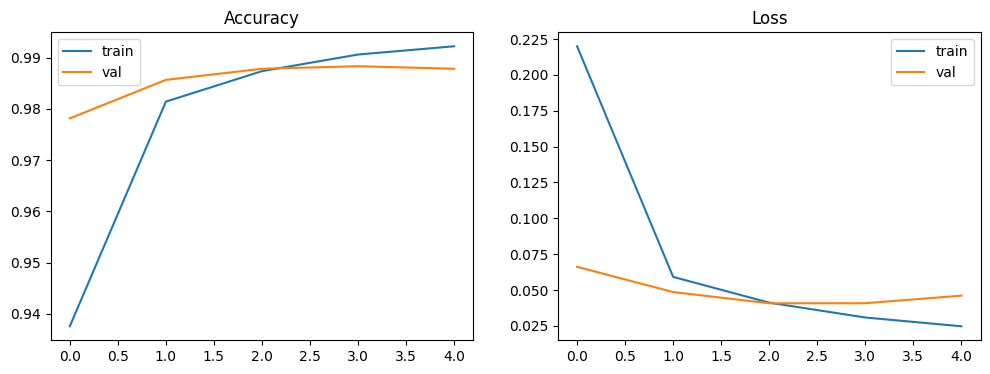

In [20]:
# 7. Plot accuracy and loss curves
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title("Loss")
plt.legend()

plt.show()


In [22]:
# 8. Save the model in new `.keras` format (recommended)
model.save("mnist_cnn.h5")

# (Optional) Save in legacy H5 format (not recommended anymore)
# model.save("mnist_cnn.h5")
